### Classification of Human Breast as Bening or Malignant using Machine Learning Algorithms.

#### As part of this project, we will use Logistic Regression, SVM with rbf kernel functions, and Random Forest for classification of a tumor in human breast as bening or malignant.


#### Let's import required libraries.

In [1]:
##
## First, we will import all the necessary libraries that we will need in the code.
##
import pandas                   as pd
import numpy                    as np
import matplotlib               as mpl
import matplotlib.pyplot        as plt
import seaborn                  as sb
from   sklearn                  import preprocessing 
from   sklearn.model_selection  import train_test_split
from   sklearn                  import svm
from   sklearn.metrics          import classification_report, confusion_matrix
import itertools
from   sklearn.tree             import DecisionTreeClassifier
from   sklearn                  import metrics
import xgboost                  as xgb
from   sklearn.model_selection  import KFold
from   sklearn.model_selection  import cross_val_score
from   sklearn.model_selection  import cross_val_predict
from   sklearn.model_selection  import validation_curve
from   sklearn                  import tree
import graphviz 
from   sklearn.model_selection  import learning_curve
from   sklearn.linear_model     import LogisticRegression
from   sklearn.ensemble         import RandomForestClassifier
from numpy                      import loadtxt
from   mlxtend.feature_selection import SequentialFeatureSelector as SFS
from   sklearn.linear_model     import LogisticRegression
from   sklearn.mixture          import GaussianMixture
from   sklearn.random_projection import GaussianRandomProjection as GRP
import random 
from   keras.models             import Sequential
from   keras.layers             import Dense
import tensorflow               as tf
from   keras.utils              import plot_model
%matplotlib inline

Using TensorFlow backend.


#### Importing the dataset from the local drive.

In [2]:
##
## Provide the directory where metadata file is stored and read the file from that library. Displaying the initial few rows.
##
cancer_path = 'D:/First Semester - MSBA - UTD/Kaggle Datasets for Practice/breast-cancer-wisconsin-data/breast-cancer-data.csv'
cancer_df = pd.read_csv(cancer_path)
cancer_df.drop(['id','Unnamed: 32'], axis=1, inplace=True)
cancer_df.head() # Displays the first 5 rows.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Diagnosis has values 'M' or 'B'. So, changing the values to 1 and 0 respectively. 

In [3]:
##
## Replacing Churn field's value with 1 for Yes and 0 for No.
##
cancer_df['diagnosis'] = cancer_df['diagnosis'].replace(to_replace=['M', 'B'], value=[1,0])
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Let's check if there are any NULLS.

In [4]:
##
## Now let's check the statistical summary of the dataframe
##
cancer_df[cancer_df.isnull().any(axis=1)].count()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
cancer_df.shape

(569, 31)

#### Heat-Map showing the correlation of variables.

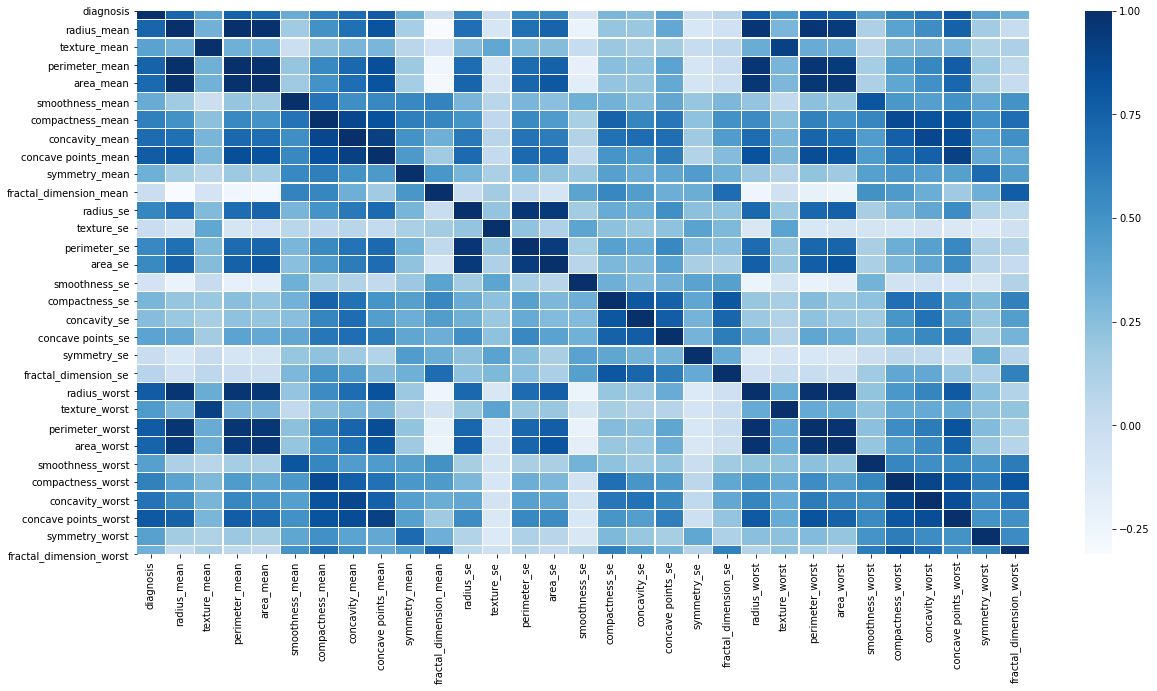

In [6]:
##
## Dropping un-wanted columns or rows.
##
corr=cancer_df.corr()
plt.figure(figsize=(20,10))
sb.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

#### Computing the mean of each feature under each group of diagnosis.

In [7]:
cancer_mean_by_class = cancer_df.groupby(['diagnosis']).mean().T
cancer_mean_by_class

diagnosis,0,1
radius_mean,12.146524,17.462830
texture_mean,17.914762,21.604906
perimeter_mean,78.075406,115.365377
area_mean,462.790196,978.376415
smoothness_mean,0.092478,0.102898
compactness_mean,0.080085,0.145188
concavity_mean,0.046058,0.160775
concave points_mean,0.025717,0.087990
symmetry_mean,0.174186,0.192909
fractal_dimension_mean,0.062867,0.062680


In [8]:
cancer_mean_by_class.rename(columns={0:'No', 1:'Yes'}, inplace=True)

#### Computing the percentage change in feature within the categories for feature selection.

In [9]:
cancer_mean_by_class['Per_Chg'] = abs((cancer_mean_by_class['Yes'] - cancer_mean_by_class['No'])/ cancer_mean_by_class['No']*100)
cancer_mean_by_class.sort_values("Per_Chg", axis = 0, ascending = False, 
                 inplace = True, na_position ='first')
cancer_mean_by_class

diagnosis,No,Yes,Per_Chg
concavity_mean,0.046058,0.160775,249.072995
area_se,21.135148,72.672406,243.846204
concave points_mean,0.025717,0.087990,242.141814
concavity_worst,0.166238,0.450606,171.060959
area_worst,558.899440,1422.286321,154.479826
concave points_worst,0.074444,0.182237,144.796717
perimeter_se,2.000321,4.323929,116.161737
radius_se,0.284082,0.609083,114.403514
area_mean,462.790196,978.376415,111.408198
compactness_worst,0.182673,0.374824,105.189070


#### Let's segregate X and Y datasets.

In [10]:
x_train = cancer_df.iloc[:,1:31]
y_train = cancer_df['diagnosis']
x_train.shape

(569, 30)

#### Backward ellimination process for feature selection.

In [11]:
cancer_back = SFS(LogisticRegression(), k_features=8, forward=False, floating=False, scoring = 'accuracy', cv=0)
cancer_back.fit(x_train, y_train)
cancer_back.k_feature_names_

C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

('radius_mean',
 'texture_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean',
 'texture_se',
 'perimeter_worst',
 'concavity_worst')

#### Data Partitioning

In [12]:
x_cancer_df = cancer_df[['concavity_mean','area_se', 'concave points_mean', 'concavity_worst', 'perimeter_se', 
                         'radius_se', 'compactness_worst', 'texture_worst','texture_mean','area_worst','radius_worst',
                        'fractal_dimension_worst', 'smoothness_worst', 'symmetry_worst','compactness_se',
                        'concavity_se','perimeter_worst','fractal_dimension_se']]
y_cancer_df = cancer_df[['diagnosis']]
x_cancer_df.head()

,concavity_mean,area_se,concave points_mean,concavity_worst,perimeter_se,radius_se,compactness_worst,texture_worst,texture_mean,area_worst,radius_worst,fractal_dimension_worst,smoothness_worst,symmetry_worst,compactness_se,concavity_se,perimeter_worst,fractal_dimension_se
0,0.3001,153.40,0.14710,0.7119,8.589,1.0950,0.6656,17.33,10.38,2019.0,25.38,0.11890,0.1622,0.4601,0.04904,0.05373,184.60,0.006193
1,0.0869,74.08,0.07017,0.2416,3.398,0.5435,0.1866,23.41,17.77,1956.0,24.99,0.08902,0.1238,0.2750,0.01308,0.01860,158.80,0.003532
2,0.1974,94.03,0.12790,0.4504,4.585,0.7456,0.4245,25.53,21.25,1709.0,23.57,0.08758,0.1444,0.3613,0.04006,0.03832,152.50,0.004571
3,0.2414,27.23,0.10520,0.6869,3.445,0.4956,0.8663,26.50,20.38,567.7,14.91,0.17300,0.2098,0.6638,0.07458,0.05661,98.87,0.009208
4,0.1980,94.44,0.10430,0.4000,5.438,0.7572,0.2050,16.67,14.34,1575.0,22.54,0.07678,0.1374,0.2364,0.02461,0.05688,152.20,0.005115


In [13]:
x_cancer_df.corr()

,concavity_mean,area_se,concave points_mean,concavity_worst,perimeter_se,radius_se,compactness_worst,texture_worst,texture_mean,area_worst,radius_worst,fractal_dimension_worst,smoothness_worst,symmetry_worst,compactness_se,concavity_se,perimeter_worst,fractal_dimension_se
concavity_mean,1.000000,0.617427,0.921391,0.884103,0.660391,0.631925,0.754968,0.299879,0.302418,0.675987,0.688236,0.514930,0.448822,0.409464,0.670279,0.691270,0.729565,0.449301
area_se,0.617427,1.000000,0.690299,0.385100,0.937655,0.951830,0.283257,0.196497,0.259845,0.811408,0.757373,0.017539,0.125389,0.074126,0.284840,0.270895,0.761213,0.127071
concave points_mean,0.921391,0.690299,1.000000,0.752399,0.710650,0.698050,0.667454,0.292752,0.293464,0.809630,0.830318,0.368661,0.452753,0.375744,0.490424,0.439167,0.855923,0.257584
concavity_worst,0.884103,0.385100,0.752399,1.000000,0.418899,0.380585,0.892261,0.368366,0.301025,0.543331,0.573975,0.686511,0.518523,0.532520,0.639147,0.662564,0.618344,0.379975
perimeter_se,0.660391,0.937655,0.710650,0.418899,1.000000,0.972794,0.341919,0.200371,0.281673,0.730713,0.697201,0.085433,0.130054,0.109930,0.416322,0.362482,0.721031,0.244143
radius_se,0.631925,0.951830,0.698050,0.380585,0.972794,1.000000,0.287103,0.194799,0.275869,0.751548,0.715065,0.049559,0.141919,0.094543,0.356065,0.332358,0.719684,0.227754
compactness_worst,0.754968,0.283257,0.667454,0.892261,0.341919,0.287103,1.000000,0.360832,0.277830,0.438296,0.475820,0.810455,0.568187,0.614441,0.678780,0.484858,0.529408,0.390159
texture_worst,0.299879,0.196497,0.292752,0.368366,0.200371,0.194799,0.360832,1.000000,0.912045,0.345842,0.359921,0.219122,0.225429,0.233027,0.143003,0.100241,0.365098,-0.003195
texture_mean,0.302418,0.259845,0.293464,0.301025,0.281673,0.275869,0.277830,0.912045,1.000000,0.343546,0.352573,0.119205,0.077503,0.105008,0.191975,0.143293,0.358040,0.054458
area_worst,0.675987,0.811408,0.809630,0.543331,0.730713,0.751548,0.438296,0.345842,0.343546,1.000000,0.984015,0.079647,0.209145,0.209146,0.199371,0.188353,0.977578,-0.022736


#### Final features selected for computation.

In [14]:
x_cancer_df = cancer_df[['concavity_mean','area_se', 'concave points_se', 'concavity_worst', 'perimeter_worst',
                          'texture_worst','fractal_dimension_worst','smoothness_worst','compactness_se','radius_mean']]

#### Normalization

In [15]:
names = x_cancer_df.columns
scale = preprocessing.StandardScaler()

x_cancer_norm_df = scale.fit_transform(x_cancer_df)
x_cancer_norm_df = pd.DataFrame(x_cancer_norm_df, columns=names)   

In [16]:
x_train_cancer, x_test_cancer, y_train_cancer, y_test_cancer = train_test_split(x_cancer_norm_df, y_cancer_df,test_size=0.3, random_state=16)

In [17]:
x_train_c = np.asarray(x_train_cancer)
y_train_c = np.asarray(y_train_cancer)

x_test_c  = np.asarray(x_test_cancer)
y_test_c  = np.asarray(y_test_cancer)

### Modelling with various algorithms

#### Logistic Regression

In [18]:
Logit_model = LogisticRegression()
Logit_model_fit = Logit_model.fit(x_train_c, y_train_c)
logit_predictions = Logit_model.predict(x_test_c)

C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
print("Logistic Model Accuracy: ", metrics.accuracy_score(y_test_c, logit_predictions))

Logistic Model Accuracy:  0.9766081871345029


In [20]:
print('Report Logistic regression - Cancer data')
print(classification_report(y_test_c, logit_predictions))

Report Logistic regression - Cancer data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       106
           1       1.00      0.94      0.97        65

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



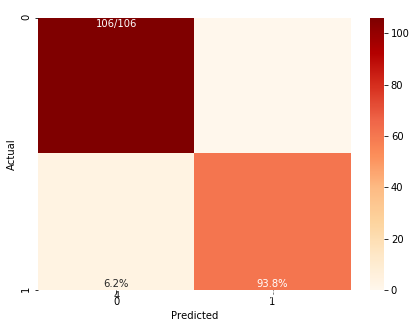

In [108]:
plot_cm(y_test_c, logit_predictions)

#### SVM Algorithm

In [21]:
svm_model_p_c = svm.SVC(kernel='rbf')
svm_model_p_c.fit = svm_model_p_c.fit(x_train_c, y_train_c)

C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
yhat_svm_pol_c = svm_model_p_c.predict(x_test_c)

In [23]:
print("SVM Accuracy Polynomial: ", metrics.accuracy_score(y_test_c, yhat_svm_pol_c))

SVM Accuracy Polynomial:  0.9883040935672515


In [24]:
print('Report Logistic regression - Cancer data')
print(classification_report(y_test_c, yhat_svm_pol_c))

Report Logistic regression - Cancer data
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       106
           1       0.98      0.98      0.98        65

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



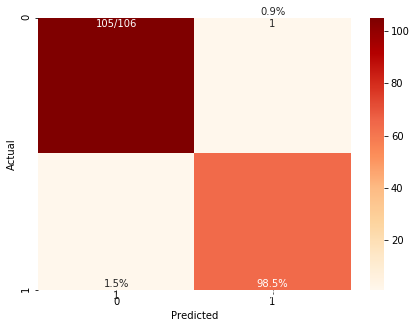

In [107]:
plot_cm(y_test_c, yhat_svm_pol_c)

#### Random Forest

In [25]:
model_rf = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 5)
model_rf.fit(x_train_c, y_train_c)
model_rf_predict = model_rf.predict(x_test_c)
print("Random Forest Accuracy: ", metrics.accuracy_score(y_test_c, model_rf_predict))

Random Forest Accuracy:  0.9824561403508771


C:\Users\sarth\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [26]:
print('Report Churn Random Forest')
print(classification_report(y_test_c, model_rf_predict))

Report Churn Random Forest
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       106
           1       0.98      0.97      0.98        65

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



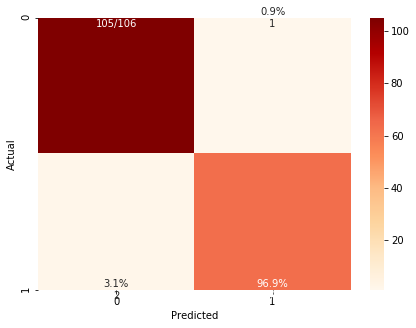

In [106]:
plot_cm(y_test_c, model_rf_predict)

#### Neural Networks

In [27]:
strategy = tf.distribute.MirroredStrategy()
print ('Number of devices: {}'.format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1


In [99]:
# Call the distribution scope context manager
with strategy.scope():
    # Define a model to fit the above data
    model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(units=11, input_dim=10),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    
    # Compile the model
    model_3.compile(loss='binary_crossentropy', optimizer='sgd')

In [100]:
model2h_fit = model_3.fit(x_train_c, y_train_c, validation_split=0.25, epochs=50, batch_size=5, verbose=1)

Train on 298 samples, validate on 100 samples
Epoch 1/50
298/298 [==============================] - 2s 5ms/sample - loss: 0.5375 - val_loss: 0.3224
Epoch 2/50
298/298 [==============================] - 0s 1ms/sample - loss: 0.2765 - val_loss: 0.2395
Epoch 3/50
298/298 [==============================] - 0s 885us/sample - loss: 0.2045 - val_loss: 0.2065
Epoch 4/50
298/298 [==============================] - 0s 952us/sample - loss: 0.1669 - val_loss: 0.1888
Epoch 5/50
298/298 [==============================] - 0s 870us/sample - loss: 0.1438 - val_loss: 0.1785
Epoch 6/50
298/298 [==============================] - 0s 902us/sample - loss: 0.1276 - val_loss: 0.1732
Epoch 7/50
298/298 [==============================] - 0s 979us/sample - loss: 0.1157 - val_loss: 0.1686
Epoch 8/50
298/298 [==============================] - 0s 1ms/sample - loss: 0.1064 - val_loss: 0.1657
Epoch 9/50
298/298 [==============================] - 0s 952us/sample - loss: 0.0991 - val_loss: 0.1637
Epoch 10/50
298/298 [===

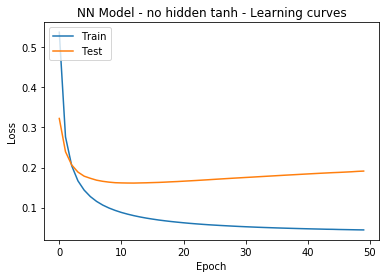

In [101]:
plt.plot(model2h_fit.history['loss'])
plt.plot(model2h_fit.history['val_loss'])
plt.title('NN Model - no hidden tanh - Learning curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [102]:
nn_predict = model_3.predict_classes(x_test_c)

In [103]:
print("Neural Network Accuracy: ", metrics.accuracy_score(y_test_c, nn_predict))

Neural Network Accuracy:  0.9766081871345029


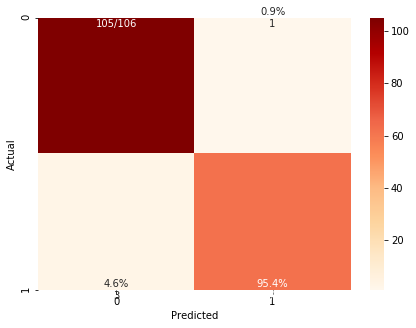

In [104]:
plot_cm(y_test_c, nn_predict)

In [105]:
print('Report  NN - no Hidden Layer')
print(classification_report(y_test_c, nn_predict))

Report  NN - no Hidden Layer
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.98      0.95      0.97        65

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



#### Confusion Matrix function defination

In [36]:
def plot_cm(y_true, y_pred, figsize=(7,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sb.heatmap(cm, cmap='OrRd', annot=annot, fmt='', ax=ax)